<a href="https://colab.research.google.com/github/haydar175/Neuromorphic-Tactile-Sensing-System-For-Textural-Features-Classification/blob/main/Object_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install snntorch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import snntorch as snn
import torch
from snntorch import spikegen
import glob
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import snntorch.spikeplot as splt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.3/125.3 kB 3.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!unzip /content/Csv_Fusion.zip -d /content

Archive:  /content/Csv_Fusion.zip
   creating: /content/Csv Fusion/Agrapheuse Comb/
  inflating: /content/Csv Fusion/Agrapheuse Comb/New Microsoft Excel Worksheet_010.csv  
  inflating: /content/Csv Fusion/Agrapheuse Comb/New Microsoft Excel Worksheet_011.csv  
  inflating: /content/Csv Fusion/Agrapheuse Comb/New Microsoft Excel Worksheet_012.csv  
  inflating: /content/Csv Fusion/Agrapheuse Comb/New Microsoft Excel Worksheet_013.csv  
  inflating: /content/Csv Fusion/Agrapheuse Comb/New Microsoft Excel Worksheet_014.csv  
  inflating: /content/Csv Fusion/Agrapheuse Comb/New Microsoft Excel Worksheet_015.csv  
  inflating: /content/Csv Fusion/Agrapheuse Comb/New Microsoft Excel Worksheet_016.csv  
  inflating: /content/Csv Fusion/Agrapheuse Comb/New Microsoft Excel Worksheet_017.csv  
  inflating: /content/Csv Fusion/Agrapheuse Comb/New Microsoft Excel Worksheet_018.csv  
  inflating: /content/Csv Fusion/Agrapheuse Comb/New Microsoft Excel Worksheet_019.csv  
  inflating: /content/Csv 

In [ ]:
data_path = '/content/Csv_Fusion'
all_files1 = glob.glob(data_path + '/*/*')
li = []
file_names = []
scaler = StandardScaler()
max_rows = 50
for i in all_files1:
    f = pd.read_csv(i)
    f = f.iloc[0:50, 0:35]
    f = np.array(f)
    f = scaler.fit_transform(f)
    num_rows_to_pad = max_rows - f.shape[0]
    padded_array = np.pad(f, ((0, num_rows_to_pad), (0, 0)), mode='constant', constant_values=0)

    li.append(padded_array)
    file_names.append(i)  # Store the file name

In [ ]:
for name, arr in zip(file_names, li):
    if arr.shape[0] < 50:
        print(name)


In [ ]:
spk = []
for i in li:
  i = torch.Tensor(i)
  spike_data = spikegen.delta(i, threshold=1, off_spike= True)
  #spike_data = spike_data.numpy()
  spk.append(spike_data)


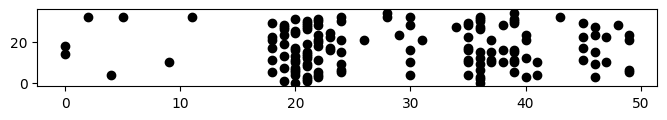

In [ ]:
fig = plt.figure(facecolor="w", figsize=(8, 1))
ax = fig.add_subplot(111)

# Raster plot of delta converted data
splt.raster(spk[1000], ax, c="black")

In [ ]:
import os

state = False
# Desired directory to save the files
# Desired directory to save the files
save_directory = "/content/data"

num_batches = len(spk) // 50 + (1 if len(spk) % 50 != 0 else 0)

# Save each array in the batches into separate files within a directory for each batch
for i in range(num_batches):
    batch_start = i * 50
    batch_end = min((i + 1) * 50, len(li))
    batch = spk[batch_start:batch_end]

    # Create a directory for the current batch
    batch_directory = os.path.join(save_directory, f"{i}")
    os.makedirs(batch_directory, exist_ok=True)

    # Save each array in the current batch into a separate file
    for j, array in enumerate(batch):
        filename = os.path.join(batch_directory, f"array_{j}.npy")
        np.save(filename, array)
        print(f"Saved array {j} of batch {i} to {filename}")

Saved array 0 of batch 0 to /content/data/0/array_0.npy
Saved array 1 of batch 0 to /content/data/0/array_1.npy
Saved array 2 of batch 0 to /content/data/0/array_2.npy
Saved array 3 of batch 0 to /content/data/0/array_3.npy
Saved array 4 of batch 0 to /content/data/0/array_4.npy
Saved array 5 of batch 0 to /content/data/0/array_5.npy
Saved array 6 of batch 0 to /content/data/0/array_6.npy
Saved array 7 of batch 0 to /content/data/0/array_7.npy
Saved array 8 of batch 0 to /content/data/0/array_8.npy
Saved array 9 of batch 0 to /content/data/0/array_9.npy
Saved array 10 of batch 0 to /content/data/0/array_10.npy
Saved array 11 of batch 0 to /content/data/0/array_11.npy
Saved array 12 of batch 0 to /content/data/0/array_12.npy
Saved array 13 of batch 0 to /content/data/0/array_13.npy
Saved array 14 of batch 0 to /content/data/0/array_14.npy
Saved array 15 of batch 0 to /content/data/0/array_15.npy
Saved array 16 of batch 0 to /content/data/0/array_16.npy
Saved array 17 of batch 0 to /cont

In [ ]:
!zip -r /content/data.zip /content/data

  adding: content/data/ (stored 0%)
  adding: content/data/14/ (stored 0%)
  adding: content/data/14/array_32.npy (deflated 95%)
  adding: content/data/14/array_36.npy (deflated 95%)
  adding: content/data/14/array_8.npy (deflated 95%)
  adding: content/data/14/array_35.npy (deflated 95%)
  adding: content/data/14/array_31.npy (deflated 95%)
  adding: content/data/14/array_22.npy (deflated 95%)
  adding: content/data/14/array_18.npy (deflated 95%)
  adding: content/data/14/array_34.npy (deflated 95%)
  adding: content/data/14/array_44.npy (deflated 95%)
  adding: content/data/14/array_49.npy (deflated 95%)
  adding: content/data/14/array_41.npy (deflated 96%)
  adding: content/data/14/array_14.npy (deflated 95%)
  adding: content/data/14/array_0.npy (deflated 96%)
  adding: content/data/14/array_3.npy (deflated 95%)
  adding: content/data/14/array_19.npy (deflated 95%)
  adding: content/data/14/array_9.npy (deflated 94%)
  adding: content/data/14/array_24.npy (deflated 95%)
  adding: c

In [ ]:
!rm -rf /content/data